In [1]:
# !pip install textBlob
# !pip install spacy

In [2]:
# !python -m spacy download en_core_web_sm

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hongfanlu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df = pd.read_csv('AI_how.csv')
df.shape

(3623, 10)

In [6]:
# Customizing stopwords for this data set
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['Thx', 'thanks', 'Thank','THANK YOU','video', 
                         'ai','AI','gpt','chatgpt','dude',
                         'mate','Youtube','subscriber','Chat',
                        'explained','great','tip','good','content',
                        'Awesome','awesome','S','omg','OMG','wonderful'])
custom_stopwords_list = list(custom_stopwords)

In [7]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Remove URLs, HTML tags, and special characters
        text = text.replace('<URL>', '').replace('<HTML>', '').replace('<SpecialChar>', '')
        # Tokenize text
        tokens = word_tokenize(text)
        # Remove stopwords
        stop_words = set(custom_stopwords)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        # Lemmatize tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        # Join tokens back into text
        preprocessed_text = ' '.join(lemmatized_tokens)
        return preprocessed_text
    else:
        return ''  # Return empty string for NaN values

In [8]:
# Apply preprocessing to the 'Comment content' column
df['Preprocessed Comment'] = df['Comment content'].apply(preprocess_text)

In [9]:
# 2. Exploratory Data Analysis (EDA)
# Basic statistical analysis
print(df['Preprocessed Comment'].describe())

count     3623
unique    3566
top           
freq        16
Name: Preprocessed Comment, dtype: object


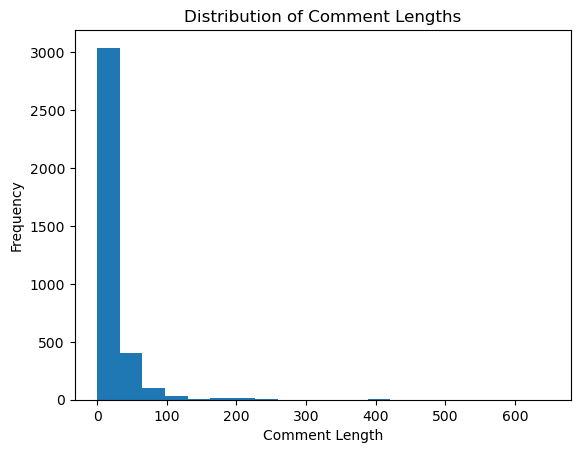

In [10]:
# Plot histogram of comment lengths
df['Comment Length'] = df['Preprocessed Comment'].apply(lambda x: len(x.split()))
plt.hist(df['Comment Length'], bins=20)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()

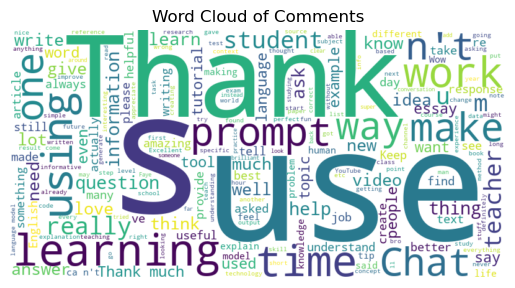

In [11]:
# Create a word cloud
all_comments = ' '.join(df['Preprocessed Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [12]:
# 3. Sentiment Analysis
# Calculate sentiment polarity using TextBlob
df['Sentiment'] = df['Preprocessed Comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

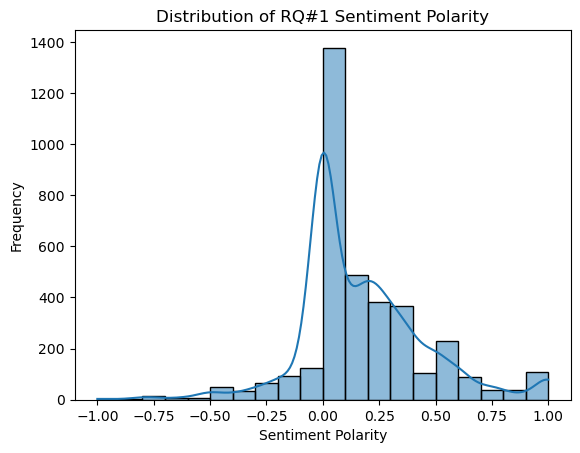

In [50]:
# Plot sentiment distribution
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of RQ#1 Sentiment Polarity')
plt.show()

In [14]:
# 4. Topic Modeling (Latent Dirichlet Allocation)
# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=custom_stopwords_list)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed Comment'])

/Users/hongfanlu/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['chat', 'thank', 'thx', 'youtube'] not in stop_words.
  warnings.warn(


In [15]:
# Apply LDA
num_topics = 10
lda_model = LatentDirichletAllocation(n_components=num_topics)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation()

In [16]:
# Print top 100 words for each topic
for idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-10:-1]  # Indices of the top 100 words
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f'Topic {idx+1}: {" ".join(top_words)}')

Topic 1: essay write use reference article writing cool paper like
Topic 2: excellent brilliant news job latest thank useful 2021 option
Topic 3: thank much love faye teacher information time like lot
Topic 4: wow thank tutorial explanation really use mike clear step
Topic 5: 00 tech work test school buddy bing chat gold
Topic 6: 10 21 said 19 share idea question 15 meme
Topic 7: amazing thank sharing man incredible sir nice keep work
Topic 8: appreciate topic effort like looking learning prompt work thank
Topic 9: helpful thank really lot informative much bri helped super
Topic 10: bro chat word well know language use question learning


In [17]:
# 5. Keyword Extraction (TF-IDF)
# Extract keywords using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed Comment'])

In [18]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

In [19]:
# Print top keywords
top_keywords = []
for i in range(tfidf_matrix.shape[0]):
    top_keyword_indices = tfidf_matrix[i].toarray().argsort()[0][::-1][:5]
    top_keywords.append([feature_names[idx] for idx in top_keyword_indices])

In [20]:
# for i in range(len(top_keywords)):
    
#     print(top_keywords[i],'\n')

In [21]:
# print(ner_results)

In [22]:
pd.set_option('display.max_colwidth', 1000)

In [23]:
pd.reset_option('display.max_colwidth',None)

In [24]:
# df.head(50)